In [16]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')
df.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [4]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [6]:
amazon_df = df.set_index('Quarter')

In [7]:
amazon_df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


<Axes: xlabel='Quarter'>

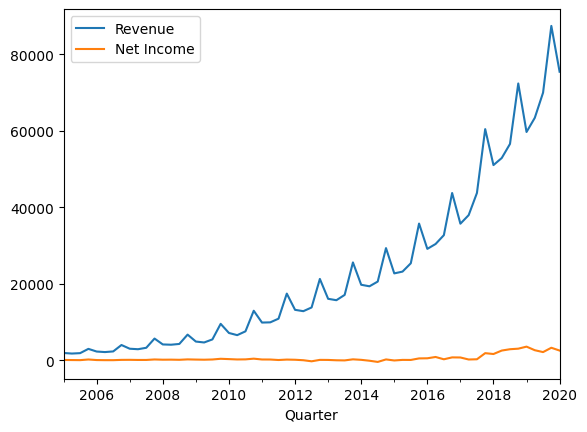

In [8]:
amazon_df.plot()

In [11]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Quarter=%{x}<br>Revenue=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2019, 12, 31, 0, 0),
                          datetime.datetime(2019, 9, 30, 0, 0),
                          datetime.datetime(2019, 6, 30, 0, 0),
                          datetime.datetime(2019, 3, 31, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0),
                          datetime.datetime(2018, 9, 30, 0, 0),
                          datetime.datetime(2018, 6, 30, 0, 0),
                          datetime.datetime(2018, 3, 31, 0, 0),
                          datetime.datetime(2017, 12, 31, 0, 0),
                          datetime.datetime(2017, 9, 30, 0, 0),
                          datetime.datetime(2017, 6, 30, 0, 0),
                          datetime.datetime(2017, 3, 31, 0, 0),
                          datetime.datetime(2016, 12, 31, 0, 0),
                          datetime.datetime(2016, 9, 30, 0, 0),
                          datetime.datetime(2016, 6, 30, 0, 0),
                          datetime.datetime(2016, 3, 31, 0, 0),
                          datetime.datetime(2015, 12, 31, 0, 0),
                          datetime.datetime(2015, 9, 30, 0, 0),
                          datetime.datetime(2015, 6, 30, 0, 0),
                          datetime.datetime(2015, 3, 31, 0, 0),
                          datetime.datetime(2014, 12, 31, 0, 0),
                          datetime.datetime(2014, 9, 30, 0, 0),
                          datetime.datetime(2014, 6, 30, 0, 0),
                          datetime.datetime(2014, 3, 31, 0, 0),
                          datetime.datetime(2013, 12, 31, 0, 0),
                          datetime.datetime(2013, 9, 30, 0, 0),
                          datetime.datetime(2013, 6, 30, 0, 0),
                          datetime.datetime(2013, 3, 31, 0, 0),
                          datetime.datetime(2012, 12, 31, 0, 0),
                          datetime.datetime(2012, 9, 30, 0, 0),
                          datetime.datetime(2012, 6, 30, 0, 0),
                          datetime.datetime(2012, 3, 31, 0, 0),
                          datetime.datetime(2011, 12, 31, 0, 0),
                          datetime.datetime(2011, 9, 30, 0, 0),
                          datetime.datetime(2011, 6, 30, 0, 0),
                          datetime.datetime(2011, 3, 31, 0, 0),
                          datetime.datetime(2010, 12, 31, 0, 0),
                          datetime.datetime(2010, 9, 30, 0, 0),
                          datetime.datetime(2010, 6, 30, 0, 0),
                          datetime.datetime(2010, 3, 31, 0, 0),
                          datetime.datetime(2009, 12, 31, 0, 0),
                          datetime.datetime(2009, 9, 30, 0, 0),
                          datetime.datetime(2009, 6, 30, 0, 0),
                          datetime.datetime(2009, 3, 31, 0, 0),
                          datetime.datetime(2008, 12, 31, 0, 0),
                          datetime.datetime(2008, 9, 30, 0, 0),
                          datetime.datetime(2008, 6, 30, 0, 0),
                          datetime.datetime(2008, 3, 31, 0, 0),
                          datetime.datetime(2007, 12, 31, 0, 0),
                          datetime.datetime(2007, 9, 30, 0, 0),
                          datetime.datetime(2007, 6, 30, 0, 0),
                          datetime.datetime(2007, 3, 31, 0, 0),
                          datetime.datetime(2006, 12, 31, 0, 0),
                          datetime.datetime(2006, 9, 30, 0, 0),
                          datetime.datetime(2006, 6, 30, 0, 0),
                

In [14]:
tstest = kpss(amazon_df['Revenue'], 'ct')


/tmp/ipykernel_224222/67782937.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [15]:
tstest

(np.float64(0.30665545975169417),
 np.float64(0.01),
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

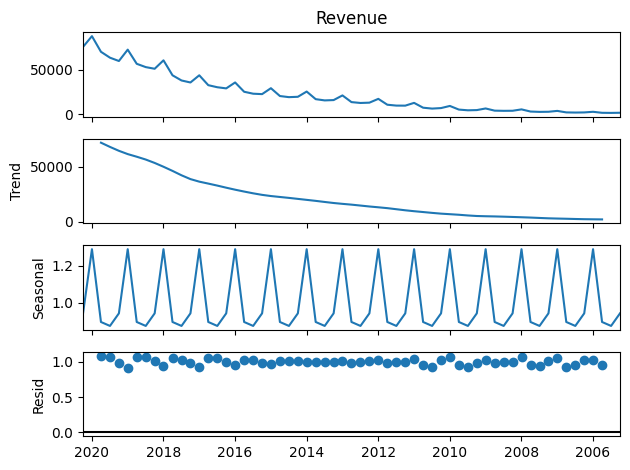

In [17]:
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                                model='multiplicative')

resplot = res.plot()

<Axes: xlabel='Quarter'>

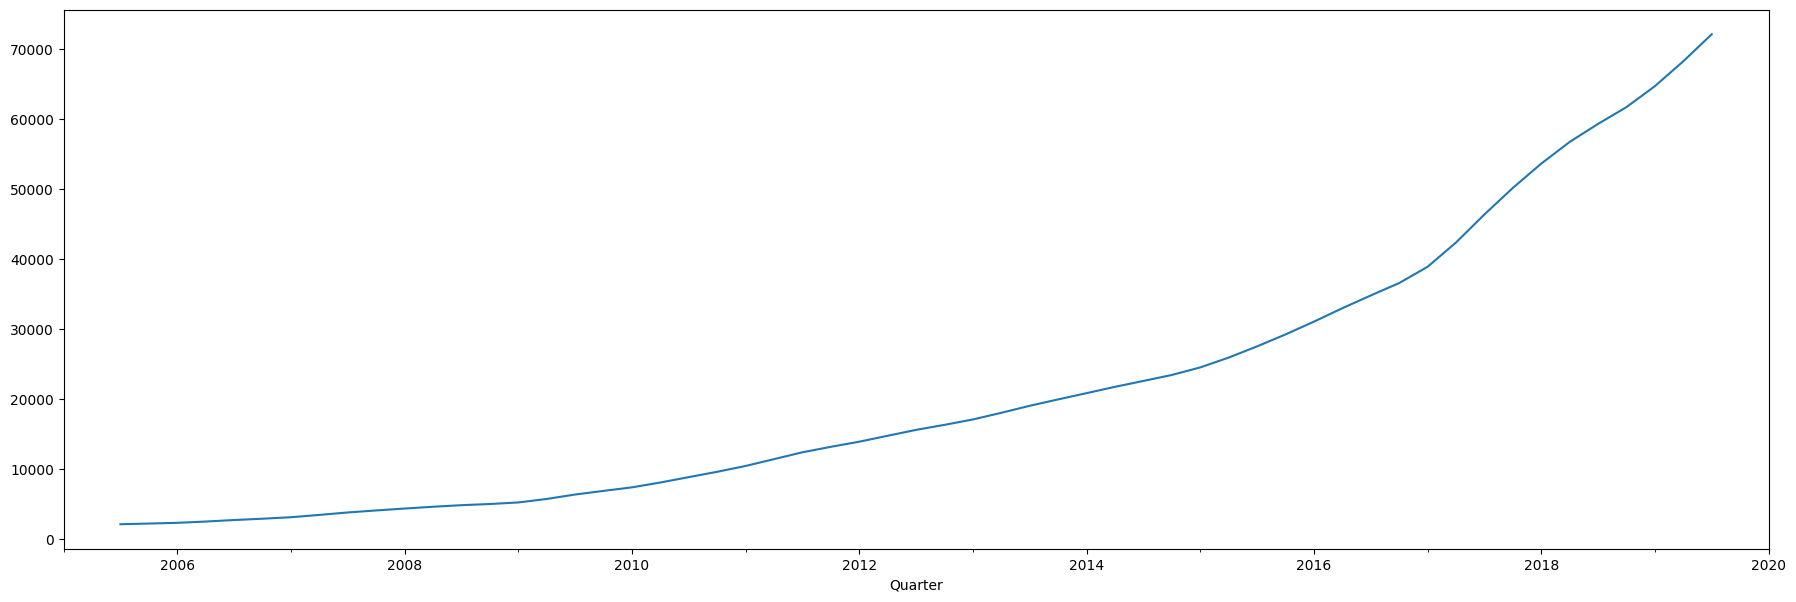

In [18]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [19]:
res.observed


Quarter
2020-03-31    75452.0
2019-12-31    87437.0
2019-09-30    69981.0
2019-06-30    63404.0
2019-03-31    59700.0
               ...   
2006-03-31     2279.0
2005-12-31     2977.0
2005-09-30     1858.0
2005-06-30     1753.0
2005-03-31     1902.0
Name: Revenue, Length: 61, dtype: float64

In [20]:
print(res.trend)

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: trend, Length: 61, dtype: float64


In [21]:
print(res.seasonal)

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: seasonal, Length: 61, dtype: float64


In [22]:
res.resid
     

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: resid, Length: 61, dtype: float64

In [24]:
res.observed.iloc[2]

np.float64(69981.0)

<Axes: xlabel='Quarter'>

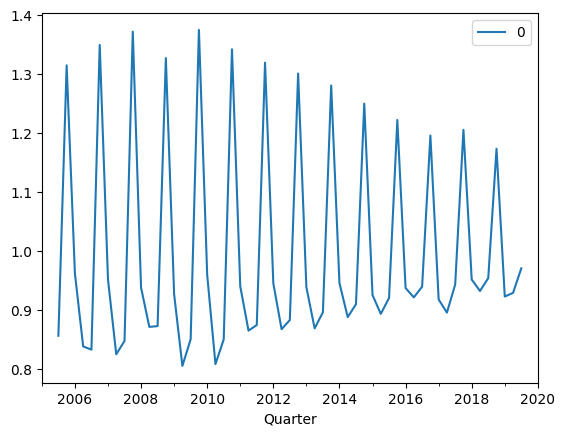

In [25]:
pd.DataFrame(res.observed/res.trend).plot()